In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
from Ames_Functions import *
from shapely.geometry import Point

In [5]:
df_house_2021 = pd.read_csv("df_RE_latlongs_v3_2021.csv", index_col = 0)
df_house_2019 = load_state_pkl()["df_RE_latlong2019"][0]
df_biz = pd.read_csv("df_EssentialLatLong_v2.csv")
df_shp = gpd.read_file("Ames_Precinct_Boundaries/Ames_-_Precincts_2.shp")

In [ ]:
df_wm_house = {}
df_wm_house[""]

In [6]:
wm_house_dict = {}
wm_house_dict["2019"] = gpd.GeoDataFrame(df_house_2019.join(df_house_2019.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)
wm_house_dict["2021"] = gpd.GeoDataFrame(df_house_2021.join(df_house_2021.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)

In [7]:
df_wm = df_shp.to_crs(epsg = 3857)

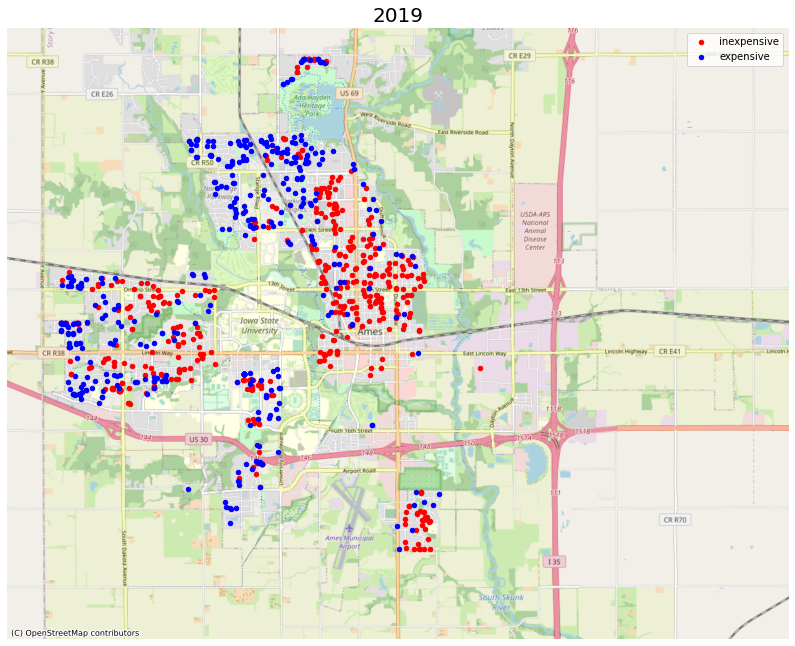

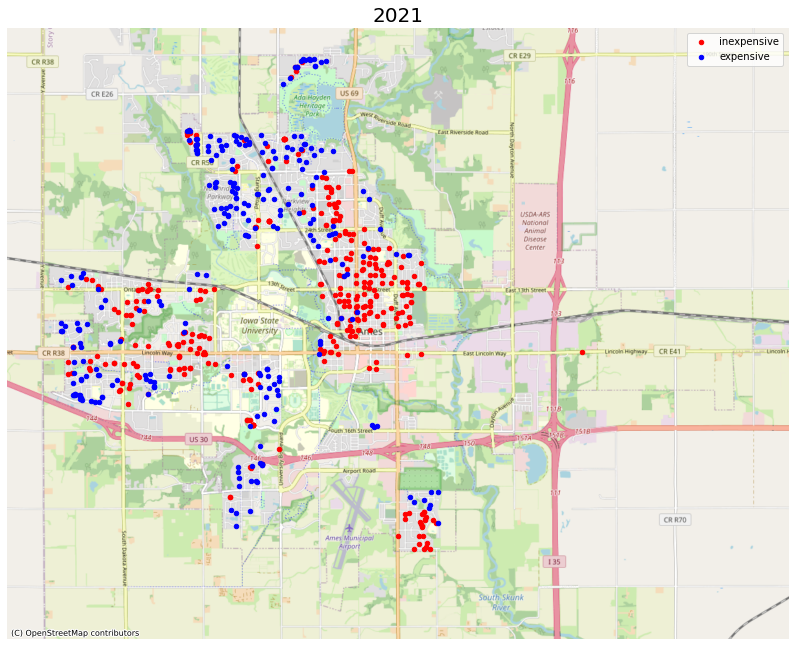

In [16]:
for year in ["2019", "2021"]:
    ax = df_wm.query("index > 0").plot(figsize = (14,14), alpha = 0)
    wm_house_dict[year].query("SalePrice <= SalePrice.mean()").plot(ax = ax, markersize = 20, color = "red", marker = "o", label = "inexpensive")
    wm_house_dict[year].query("SalePrice > SalePrice.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "expensive")
    cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
    plt.axis("off")
    plt.title(year, fontdict = {"fontsize":"20"})
    plt.legend()
    plt.show()
    #df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")

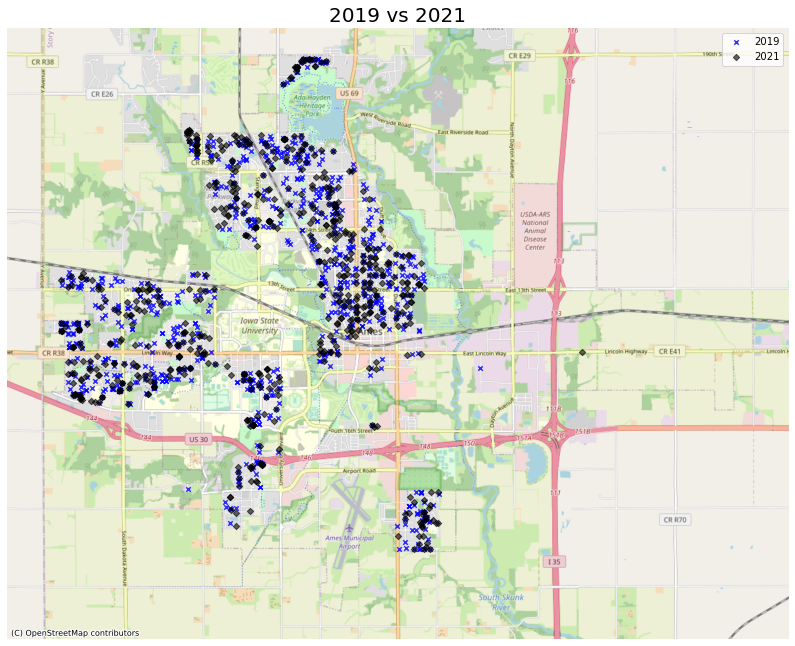

In [43]:
ax = df_wm.query("index > 0").plot(figsize = (14,14), alpha = 0)
wm_house_dict["2019"].plot(ax = ax, markersize = 20, color = "blue", marker = "x", label = "2019", alpha = 0.8)
wm_house_dict["2021"].plot(ax = ax, markersize = 20, color = "k", marker = "D", label = "2021", alpha = 0.6)
cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
plt.axis("off")
plt.title("2019 vs 2021", fontdict = {"fontsize": "20"})
plt.legend()
plt.show()

In [ ]:
def plot_by_attribute (attr):
    ax = df_wm.query("index > 0").plot(figsize = (14,14), alpha = 0)
    wm_house_dict[year].query(f"{attr} <= {attr}.mean()").plot(ax = ax, markersize = 20, color = "red", marker = "o", label = f"{attr} below mean")
    wm_house_dict[year].query(f"{attr} > {attr}.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = f"{attr} above mean")
    cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
    plt.axis("off")
    plt.title(year, fontdict = {"fontsize":"20"})
    plt.legend()
    plt.show()
    #df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")